In [65]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
data = pd.read_csv('C:/Users/sanke/Documents/MSexcel/titanic.csv') 
# To know number of columns and rows 
data.shape 
# (891, 12) 

(891, 17)

In [67]:
data.isnull().sum() 

Unnamed: 0     0
PassengerId    0
Survived       0
Sex            0
Age            0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Family_size    0
Title_1        0
Title_2        0
Title_3        0
Title_4        0
Emb_1          0
Emb_2          0
Emb_3          0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Pclass_1     891 non-null    int64  
 7   Pclass_2     891 non-null    int64  
 8   Pclass_3     891 non-null    int64  
 9   Family_size  891 non-null    float64
 10  Title_1      891 non-null    int64  
 11  Title_2      891 non-null    int64  
 12  Title_3      891 non-null    int64  
 13  Title_4      891 non-null    int64  
 14  Emb_1        891 non-null    int64  
 15  Emb_2        891 non-null    int64  
 16  Emb_3        891 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 118.5 KB


### Select relevant features

In [69]:

features = ['Pclass_2', 'Age', 'Survived', 'Fare', 'Pclass_3', 'Emb_2']
X = data[features]
y = data['Survived']

### Split the data into training and testing sets

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build and train the machine learning model

In [71]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

### Make predictions and evaluate the model

In [72]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        77

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Print the predictions

In [77]:
X_test = data[features]  # Use the same 'features' list as in the training dataset
y_test_pred = model.predict(X_test)
test_predictions = pd.DataFrame({'PassengerId': data['PassengerId'], 'Survived': y_test_pred})
print(test_predictions)

     PassengerId  Survived
0              1         0
1              2         1
2              3         1
3              4         1
4              5         0
..           ...       ...
886          887         1
887          888         0
888          889         0
889          890         0
890          891         1

[891 rows x 2 columns]


### Predicted Survival Distributio countplot

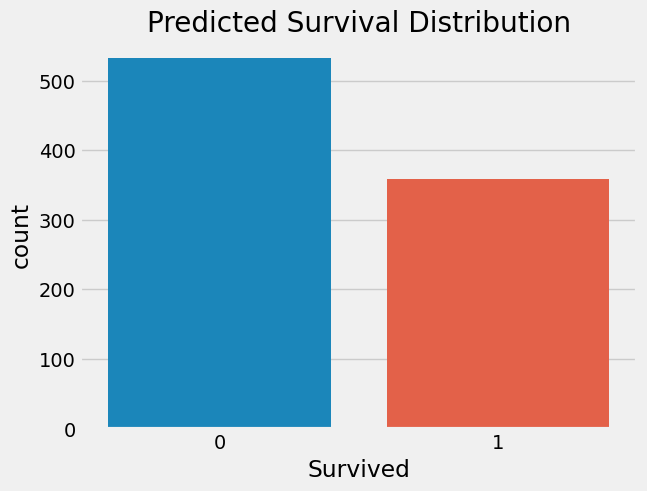

In [78]:
sns.countplot(x='Survived', data=test_predictions)
plt.title('Predicted Survival Distribution')
plt.show()